In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

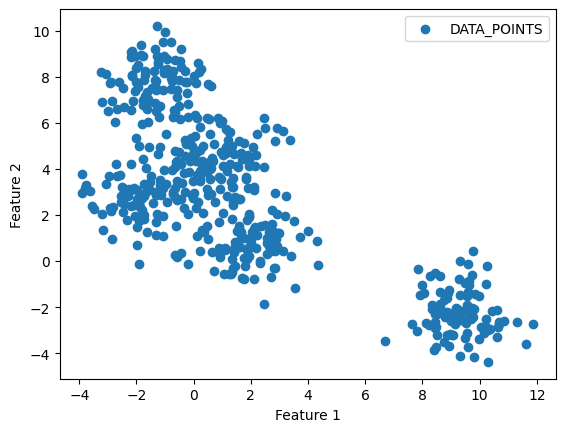

In [3]:

plt.scatter(X,Y,label = 'DATA_POINTS')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [4]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [5]:
def Distance(P1, P2):
    distance = np.sqrt((P2.x-P1.x)**2 + (P2.y-P1.y)**2)
    return distance

def Mean(AP):
    x_mean = np.mean([P.x for P in AP])
    y_mean = np.mean([P.y for P in AP])
    return Point(x_mean, y_mean)

In [6]:
def MinPoint(point, centroids):
    distances = [Distance(point, centroid) for centroid in centroids]
    return np.argmin(distances)


In [7]:
def equality(Cluster1, Cluster2):
    return Cluster1 == Cluster2

In [8]:
def kMeans(x_coords, y_coords, num_clusters):
    points = [Point(x, y) for x, y in zip(x_coords, y_coords)]
    centroids = random.sample(points, num_clusters)
    
    clusters = {i: [] for i in range(num_clusters)}
    previous_clusters = None
    
    while not equality(clusters, previous_clusters):
        previous_clusters = clusters
        clusters = {i: [] for i in range(num_clusters)}
        
        for point in points:
            nearest_centroid_index = MinPoint(point, centroids)
            clusters[nearest_centroid_index].append(point)
        
        for i in range(num_clusters):
            centroids[i] = Mean(clusters[i])
    
    return [centroids, random.sample(points, num_clusters), clusters]

In [9]:
def Elbow(X, Y):
    
    wscc = []
    for k in range(1, 11):  # Using 1 to 10 clusters
        kM, kMi, D = kMeans(X, Y, k)
        sum_squares = 0
        for i in range(k):
            sum_squares += sum(Distance(P, kM[i])**2 for P in D[i])
        wscc.append(sum_squares)
    return wscc

In [10]:
Elbow(X,Y)

[14423.995571116931,
 4390.702977889529,
 2183.128805101278,
 2134.6114840876708,
 879.9759321764251,
 790.8807341534616,
 714.3969313226257,
 660.3367894758795,
 624.8659214563907,
 588.8268277388041]

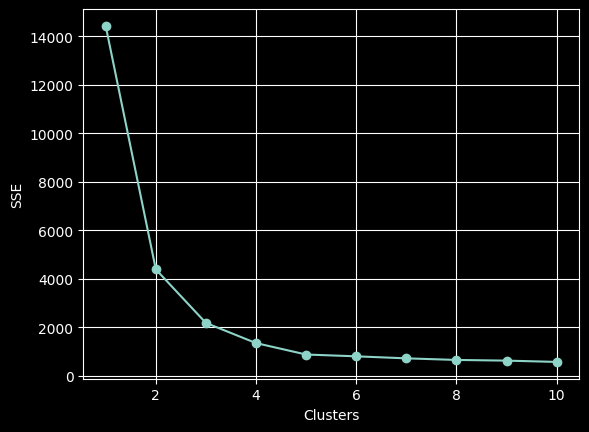

In [11]:
plt.style.use('dark_background')
plt.plot(range(1, 11), Elbow(X,Y), marker='o')

plt.ylabel('SSE')
plt.xlabel('Clusters')
plt.grid()
plt.show()


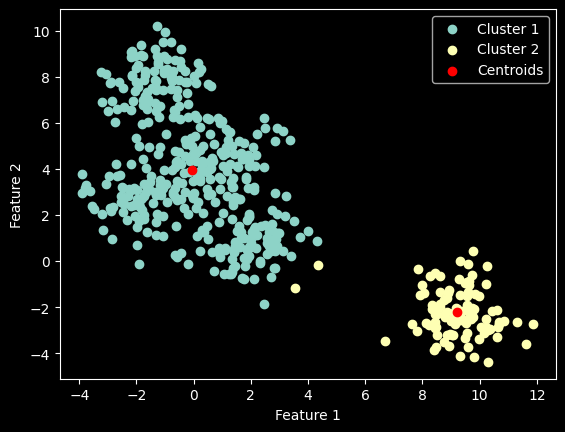

In [12]:

k = 2  
final_centroids, initial_centroids, D = kMeans(X, Y, k)

for i, (centroid, cluster_points) in enumerate(D.items()):
    
    plt.scatter([point.x for point in cluster_points], [point.y for point in cluster_points], label=f'Cluster {i+1}')



plt.scatter([point.x for point in final_centroids], [point.y for point in final_centroids], label='Centroids',color = 'red')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()